In [165]:
"""
Descrição do Problema: Otimização de duas funções multimodais usando os algoritmos
PSO e GA conforme descrito a seguir.
"""
import numpy as np

# função G01
def g01(x: np.array):
    sum1 = 0
    for i in range(4):
        sum1 += x[i]**2

    sum2 = 0
    for i in range(13):
        sum2 += x[i]

    return 5*x[0] + 5*x[1] + 5*x[2] + 5*x[3] - 5*sum1 - sum2

# restrições
constraint_eq = [
    lambda x: 2*x[0] + 2*x[1] + x[9] + x[10] - 10,
    lambda x: 2*x[0] + 2*x[2] + x[9] + x[11] - 10,
    lambda x: 2*x[1] + 2*x[2] + x[10] + x[11] - 10,
    lambda x: -8*x[0] + x[9],
    lambda x: -8*x[1] + x[10],
    lambda x: -8*x[2] + x[11],
    lambda x: -2*x[3] - x[4] + x[9],
    lambda x: -2*x[5] - x[6] + x[10],
    lambda x: -2*x[7] - x[8] + x[11]
]

lower_bounds = [0]*13
upper_bounds = [1]*9 + [100] * 3 + [1]

In [172]:
from sko.GA import GA

ga = GA(g01, n_dim=13, size_pop=50, max_iter=100, lb=lower_bounds, ub=upper_bounds, constraint_eq=constraint_eq)
best_x_ga, best_y_ga = ga.run()
print(f'best_x: {best_x_ga}\n GA Best Error: {best_y_ga}')

best_x: [0.55638466 0.44532773 0.3883827  0.98499602 0.89934736 0.9290359
 0.98810065 0.88081043 0.92622727 4.47488977 3.56459972 2.90302625
 0.35965051]
 GA Best Error: [-14.5700182]


In [173]:
import plotly.graph_objects as go
history_ga_best = [y.min() for y in ga.all_history_Y]

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history_ga_best))), y=history_ga_best, name='Best GA', mode='lines'))
for i, Y in enumerate(ga.all_history_Y):
    x = [i]*len(Y)
    fig.add_trace(go.Scatter(x=[i]*len(Y), y=Y, mode='markers', marker=dict(color='red', size=3), showlegend=False))

fig.update_layout(title='GA Convergence Curve')
fig.show()

In [174]:
# função G02

def g02(x: np.array):
    return (x[0] -10)** 2 + 5*(x[1] -12)**2 + x[2]**4 + 3*(x[3] - 11)**2 + 10*x[4]**6 + 7*x[5]**2 + x[6]**4 - 4*x[5]*x[6] - 10*x[5] - 8*x[6]

# restrições
constraint_eq = [
    lambda x: 127 - 2*x[0]**2 - 3*x[1]**4 - x[2] - 4*x[3]**2 - 5*x[4],
    lambda x: 282 - 7*x[0] - 3*x[1] - 10*x[2]**2 - x[3] + x[4],
    lambda x: 196 - 23*x[0] - x[1]**2 - 6*x[5]**2 + 8*x[6],
    lambda x: -4*x[0]**2 +  x[1]**2 + 3*x[0]*x[1] - 2*x[2]**2 - 5*x[5] + 11*x[6]
]

In [175]:
ga = GA(g02, n_dim=7, size_pop=50, max_iter=100, lb=[-10]*7, ub=[10]*7, constraint_eq=constraint_eq)
best_x_ga, best_y_ga = ga.run()
print(f'best_x: {best_x_ga}\n GA Best Error: {best_y_ga}')

best_x: [-4.97688523 -0.58164444  5.58117291  3.68171839  3.35898352 -8.06913107
  9.91575256]
 GA Best Error: [26954.25967886]


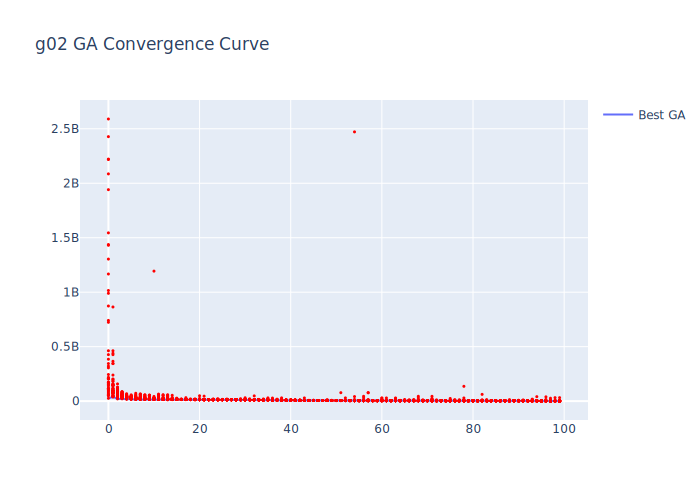

In [177]:
import plotly.graph_objects as go
history_ga_best = [y.min() for y in ga.all_history_Y]

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(history_ga_best))), y=history_ga_best, name='Best GA', mode='lines'))
for i, Y in enumerate(ga.all_history_Y):
    x = [i]*len(Y)
    fig.add_trace(go.Scatter(x=[i]*len(Y), y=Y, mode='markers', marker=dict(color='red', size=3), showlegend=False))

fig.update_layout(title='g02 GA Convergence Curve')
fig.show('svg')